In [79]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mat
%matplotlib inline

**2. Data Importation**
Loading Datasets

In [80]:
df = pd.read_csv("https://bit.ly/3deaKEM")
df.head(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


Analyze Dataset

In [81]:
df.shape

(21201, 29)

In [82]:
df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [83]:
# check the data types 
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [84]:
# Glossary
glossary =pd.read_csv("https://bit.ly/30O3xsr")
glossary

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


***3. Dataset Cleanup***

In [85]:
# Check for duplicte values
df.duplicated().sum()

0

In [86]:
# check for missing values
df.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [87]:
# filling the missing values in the Temperature Column with the mean of that column
#Finding the mean of the Temperature column 
mean_value_temp=df['Temperature'].mean()
  
# Replace NaNs in column Temperature with the mean_value_temp

df['Temperature'].fillna(value=mean_value_temp, inplace=True)

df.dropna(inplace = True)

In [69]:
# Drop Precipitation in millimeters column
df.drop(columns = ['Precipitation in millimeters'], inplace = True)

In [70]:
df.isna().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Pickup Lat   

In [88]:
# check how many null values exist in the data.
df.isnull().sum().sort_values(ascending = False)

Order No                                     0
Pickup - Weekday (Mo = 1)                    0
Rider Id                                     0
Destination Long                             0
Destination Lat                              0
Pickup Long                                  0
Pickup Lat                                   0
Precipitation in millimeters                 0
Temperature                                  0
Distance (KM)                                0
Arrival at Destination - Time                0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Day of Month        0
Pickup - Time                                0
Pickup - Day of Month                        0
User Id                                      0
Arrival at Pickup - Time                     0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Day of Month             0
Confirmation - Time                          0
Confirmation - Weekday (Mo = 1)              0
Confirmation 

In [89]:
#Separate categorical and numerical columns in the data frame
numerical_columns = df.columns[df.dtypes !='object']
categorical_columns = df.columns[df.dtypes =='object']

print(numerical_columns)
print(categorical_columns)

Index(['Platform Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long',
       'Time from Pickup to Arrival'],
      dtype='object')
Index(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business',
       'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
       'Pickup - Time', 'Arrival at Destination - Time', 'Rider Id'],
      dtype='object')


In [90]:
# Evaluate Personal or Business
df['Personal or Business'].value_counts()


Business    434
Personal    118
Name: Personal or Business, dtype: int64

**Data Analysis**

In [91]:
#encode the column 'Personal or Business' in order to plot the frequency of order type
df['Personal or Business'] = np.where(df['Personal or Business'].str.contains("Business", "Personal"), 1, 0)

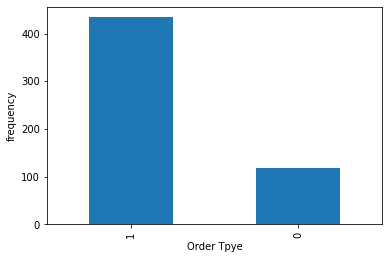

In [92]:
#visualize the orders types: Personal or Business
fig, ax = plt.subplots()
df['Personal or Business'].value_counts().plot(ax=ax, kind='bar', xlabel='Order Tpye', ylabel='frequency')

plt.show()

In [93]:

df.isnull().any().any() 
df.isnull().any()

Order No                                     False
User Id                                      False
Vehicle Type                                 False
Platform Type                                False
Personal or Business                         False
Placement - Day of Month                     False
Placement - Weekday (Mo = 1)                 False
Placement - Time                             False
Confirmation - Day of Month                  False
Confirmation - Weekday (Mo = 1)              False
Confirmation - Time                          False
Arrival at Pickup - Day of Month             False
Arrival at Pickup - Weekday (Mo = 1)         False
Arrival at Pickup - Time                     False
Pickup - Day of Month                        False
Pickup - Weekday (Mo = 1)                    False
Pickup - Time                                False
Arrival at Destination - Day of Month        False
Arrival at Destination - Weekday (Mo = 1)    False
Arrival at Destination - Time  

**Data Modelling**

In [94]:
# splitting the training and testing data
from sklearn.model_selection import train_test_split

#selecting the features to use
X = df[['Platform Type','Personal or Business','Placement - Day of Month', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)','Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)','Distance (KM)','Temperature']]
y = df['Time from Pickup to Arrival']

#splitting the subset dataframe  into 75-25 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=27)

In [96]:
# View Results
print('X.shape :', X.shape)
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)

X.shape : (552, 14)
X_train.shape : (414, 14)
X_test.shape : (138, 14)


In [95]:
# Test Dataset
X_test

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature
18787,3,1,8,6,8,6,8,6,8,6,8,6,12,23.3
8080,3,1,20,4,20,4,20,4,20,4,20,4,11,18.5
14616,3,1,26,1,26,1,26,1,26,1,26,1,11,22.4
2482,3,1,24,3,24,3,24,3,24,3,24,3,3,16.9
2089,3,1,27,2,27,2,27,2,27,2,27,2,9,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18343,3,1,3,1,3,1,3,1,3,1,3,1,8,18.3
21159,3,0,20,4,20,4,20,4,20,4,20,4,21,18.6
8239,3,0,18,1,18,1,18,1,18,1,18,1,12,15.2
5098,3,1,4,2,4,2,4,2,4,2,4,2,7,23.9


In [97]:
# Import required Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


# importing the required libraries 

from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler


In [98]:
#instantiating the models
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# Fitting in our models  
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Evaluating the base model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 1014.2748186775293
KNN RMSE: 845.9903816220971
Decision Tree RMSE: 994.2482366891179
